In [23]:
from data_help.data_help import *
from mlp.mlp import *
from data_help.stratcv import *
from scipy.stats import ttest_ind
from sklearn.metrics import roc_auc_score

# CSMLP Experiments
## 1. vehicle

In [5]:
# Configuration
dataset_name = 'vehicle'
T = dataset_load(dataset_name)
T1, T2 = split_by_label(T)

mu = 0.1
beta = 10
h = 7

# Compute lambda
_lambda = len(T2) / len(T)

In [ ]:
# standard MLP
mlp_base = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta)
base_acc = kfold_cv(mlp_base, T, 5)

Final loss= [[378.17828548]]
Re-optimizing from loss at 205.025
Final loss= [[293.38951451]]41]][[293.38985454]][[293.38951451]]
Re-optimizing from loss at 179.118
Final loss= [[299.9687305]]
Re-optimizing from loss at 168.181
Final loss= [[397.99999724]]
[0.9783616692426584, 0.21105527638190955, 0.594708472812284, 0.7978723404255319, 0.594708472812284, 0.4544099388255891]


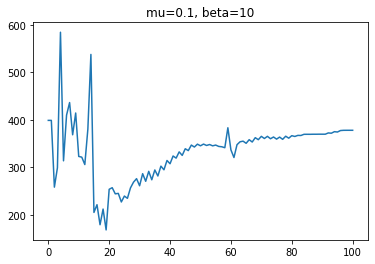

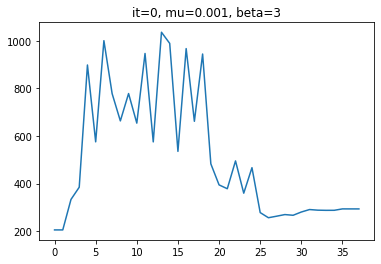

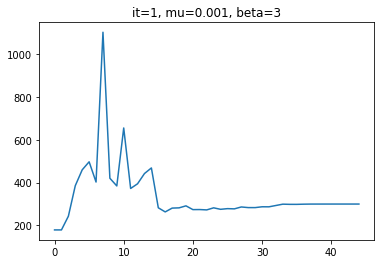

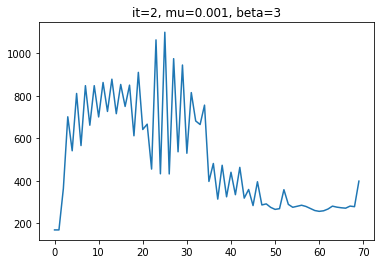

In [7]:
mlp_base1 = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta, repeat=True)
mlp_base1.train(T1, T2)
mlp_base_acc1 = eval_mlp(mlp_base1, T, T1, T2)
print(mlp_base_acc1)

In [15]:
# CSMLP
csmlp = MLP(T1.shape[1], h, _lambda, np.tanh, mu, beta)
csmlp_acc = kfold_cv(csmlp, T, 5)

Final loss= [[224.42369475]]
[0.8076923076923077, 0.525, 0.591491238051889, 0.7411764705882353, 0.6663461538461539, 0.6511823565933444]
[363.36554446]][[378.0561874]][[427.03602368]][[406.29008835]][[392.7124512]][[423.88191687]][[299.46292506]][[298.41957635]][[309.49930123]][[302.82656773]][[434.38718654]][[510.40554078]][[397.69048048]][[374.15665747]][[406.24803092]][[266.27285943]][[488.74446086]]Final loss= [[488.74446086]]
[1.0, 0.0, 0.2363367799113737, 0.7692307692307693, 0.5, 0.0]
Final loss= [[486.62924668]]
[0.0, 1.0, 0.7651403249630724, 0.23668639053254437, 0.5, 0.0]
[571.118002]][[612.5996087]][[581.08261051]][[639.35468094]][[638.39827506]][[635.47198882]][[632.48609077]][[283.94092776]][[195.4688862]][[234.24381646]][[223.08678612]][[196.59639114]][[208.07023684]][[200.97600506]][[215.02902019]][[221.65464704]][[227.0159386]][[228.11328025]][[229.30154317]][[230.53269352]][[231.79404912]][[233.07858059]][[234.3817329]][[235.70057971]][[237.03318751]][[238.37803911]][[239

In [14]:
csmlp1 = MLP(T1.shape[1], h, _lambda, np.tanh, mu, beta)
csmlp1.train(T1, T2)
csmlp_acc1 = eval_mlp(csmlp1, T, T1, T2)
print(csmlp_acc1)

[355.77251992]][[344.06155814]][[371.53413878]][[327.77128407]][[374.8441289]][[304.08615332]][[280.93184663]][[280.94529674]][[294.17451997]][[298.89627592]][[308.25623873]][[375.64335634]][[375.55771929]][[407.52814228]][[440.82953932]][[444.94745466]][[450.28596851]][[456.28982897]][[462.61581813]][[462.59727248]][[462.71103106]][[462.92815739]][[462.93059329]]Final loss= [[462.93059667]]
[0.8732612055641422, 0.3065326633165829, 0.4398411502046021, 0.7399527186761229, 0.5898969344403626, 0.5173809844907585]


Final loss= [[434.19502947]]35]][[438.6525461]][[437.2333991]][[361.81674128]][[431.0961]][[418.7629123]][[434.19534503]][[434.19502947]]
Re-optimizing from loss at 254.492
Final loss= [[483.34911243]]
Re-optimizing from loss at 250.666
Final loss= [[403.59950243]]
Re-optimizing from loss at 242.533
Final loss= [[242.43268048]]
[0.7769230769230769, 0.3, 0.41217569412835686, 0.6647058823529411, 0.5384615384615384, 0.48278040875425243]
[217.87155562]][[222.53302264]][[229.12696557]][[239.63779093]][[261.97324203]][[233.84253224]][[206.95965199]][[241.0486064]][[238.8252551]][[255.67714892]][[246.11608865]][[244.15894926]][[246.65008294]][[248.6491696]][[276.30552128]][[245.75191501]][[377.17790816]][[409.01590463]][[418.55080394]][[423.86362663]][[426.2305779]][[427.09254622]][[427.4180095]][[426.50689942]][[275.61878841]][[406.41813894]][[260.66365887]][[488.74446086]]Final loss= [[488.74446086]]
Re-optimizing from loss at 213.044
Final loss= [[241.35586178]]25]][[241.08318604]][[241.35

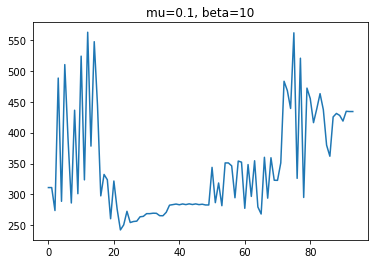

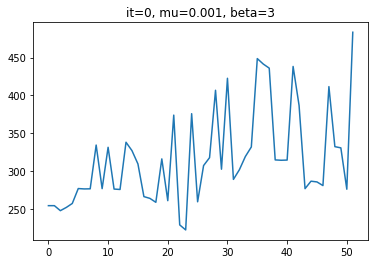

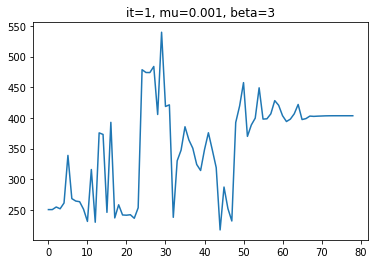

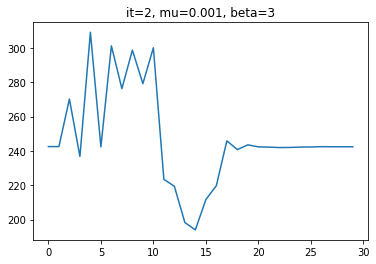

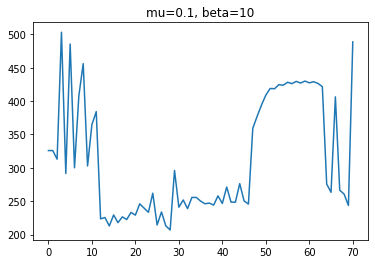

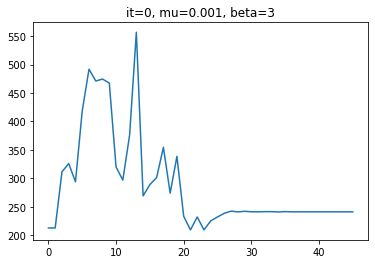

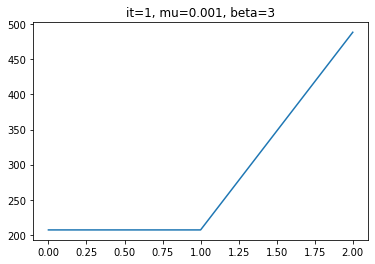

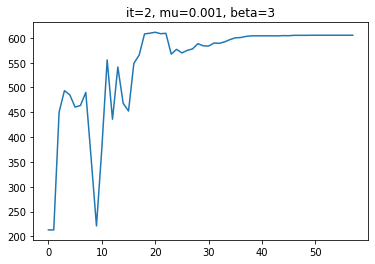

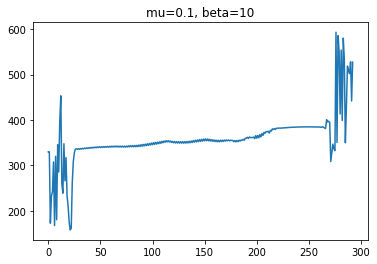

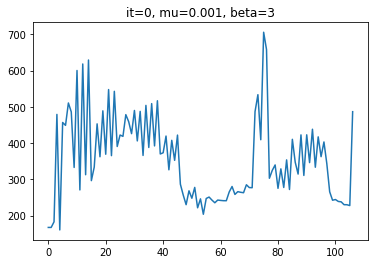

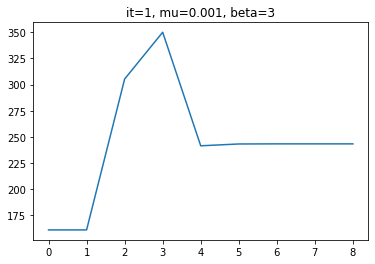

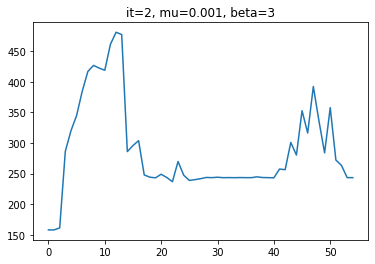

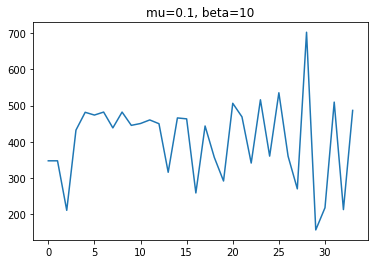

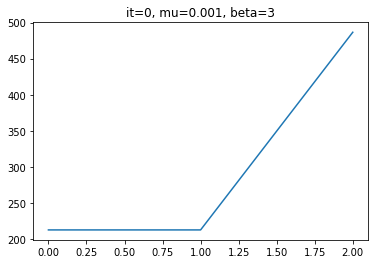

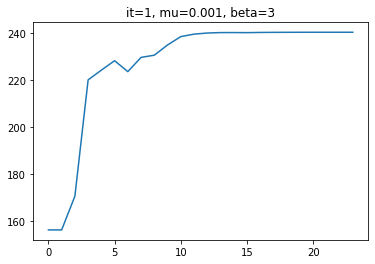

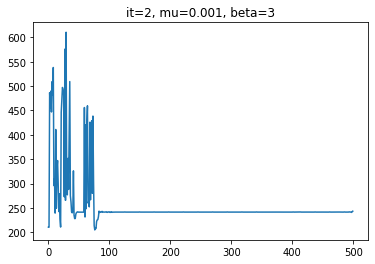

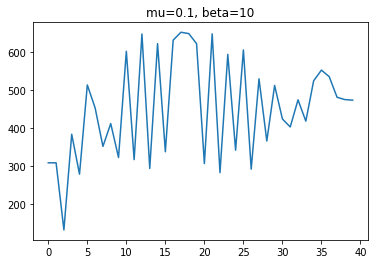

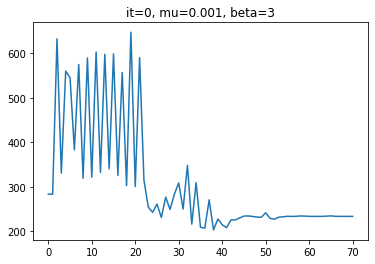

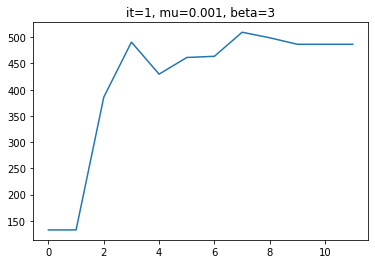

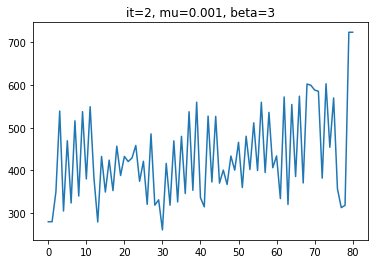

In [8]:
# repeat CSMLP
rpcsmlp = MLP(T1.shape[1], h, _lambda, np.tanh, mu, beta, repeat=True)
rpcsmlp_acc = kfold_cv(rpcsmlp, T, 5)

In [ ]:
# repeat CSMLP
rpcsmlp1 = MLP(T1.shape[1], h, _lambda, np.tanh, mu, beta, repeat=True)
rpcsmlp1_acc = kfold_cv(rpcsmlp1, T, 5)

In [ ]:
print("Base mlp accuracy:", base_acc)
print("csmlp accuracy:", csmlp_acc)
print("rpcsmlp accuracy:", rpcsmlp_acc)

In [20]:
# Print overall accuracies
final_accs = np.mean(rpcsmlp_acc, axis=0)
print_accs(final_accs)

Majority class accuracy: 0.6833512224209899
Minority class accuracy: 0.6093589743589743
Overall weighted accuracy 0.6266487103983168
Overall accuracy 0.6654855551688131
Weighted accuracy 0.6463550983899822
Gmean accuracy 0.6263375847345903


## t-tests

In [ ]:
base_vs_cs = ttest_ind(base_acc, csmlp_acc)
print(base_vs_cs)

In [ ]:
cs_vs_repeat = ttest_ind(csmlp_acc, rpcsmlp_acc)
print(cs_vs_repeat)

In [24]:
y_scores = [rpcsmlp.predict(ex[1:-1]) for ex in T]
y_true = [ex[-1] for ex in T]
roc_auc_score(y_true, y_scores)

0.3575062328644769

In [25]:
y_scores = [csmlp.predict(ex[1:-1]) for ex in T]
y_true = [ex[-1] for ex in T]
roc_auc_score(y_true, y_scores)

0.5607170318361514

In [26]:
y_scores = [mlp_base.predict(ex[1:-1]) for ex in T]
y_true = [ex[-1] for ex in T]
roc_auc_score(y_true, y_scores)

0.2683121946673087

In [28]:
cs_vs_repeat = ttest_ind(csmlp_acc1, base_acc)
print(cs_vs_repeat)

Ttest_indResult(statistic=array([-60.42857143,   5.        ,   0.38071563,  -2.37519429,
         2.94328121,  10.08986704]), pvalue=array([2.73739199e-04, 3.77495514e-02, 7.40048287e-01, 1.40771903e-01,
       9.86488804e-02, 9.68026237e-03]))
